In [117]:
import time
#import pydoocs
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

import seaborn as sns

In [2]:
f=h5py.File('data_jan15_axisin_lasingoff400_lastpphase.hdf5', 'r')

In [3]:
f.keys()

<KeysViewHDF5 ['1', '2', '5', 'XGMenergy', 'bams', 'bpm', 'camera_image', 'charge']>

In [5]:
f['1'].keys()

<KeysViewHDF5 ['com11', 'com11_timestamp', 'com12', 'com12_timestamp']>

In [54]:
data1c11=f['1']['com11']
#data1c11.shape
nonzeroindx=np.nonzero(data1c11[:,1,2])
datacomp11=data1c11[nonzeroindx[0][2],1,:]
#datacomp11.shape
data1c12=f['1']['com12']
nonzeroindx=np.nonzero(data1c12[:,1,2])
datacomp12=data1c12[nonzeroindx[0][2],1,:]
#datacomp12.shape
data1c51=f['5']['com51']
nonzeroindx=np.nonzero(data1c51[:,1,2])
datacomp51=data1c51[nonzeroindx[0][2],1,:]
datacomp51.shape

data1c52=f['5']['com52']
nonzeroindx=np.nonzero(data1c51[:,1,2])
datacomp52=data1c51[nonzeroindx[0][2],1,:]
#datacomp52.shape

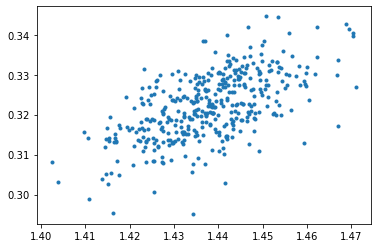

In [71]:
plt.plot(datacomp12, datacomp11,'.' )

In [85]:
com11_timestamp=f['1']['com11_timestamp']
com51_timestamp=f['5']['com51_timestamp']
image_timestamp=f['camera_image']['cam_img_timestamp']
# we check the time stamps !
nonzeroindx=np.nonzero(com11_timestamp[0] - com51_timestamp[0])
print(nonzeroindx[0][0])
nonzeroindx=np.nonzero(com11_timestamp[0] - image_timestamp[0])
print(nonzeroindx)
# the camera image and BCM are synchronised 

0
(array([0]),)


In [80]:
f['camera_image'].keys()

<KeysViewHDF5 ['cam_img', 'cam_img_timestamp']>

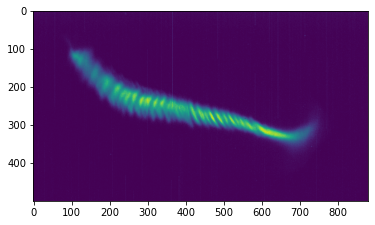

In [83]:
plt.imshow(f['camera_image']['cam_img'][:,:,1])

In [86]:
images=f['camera_image']['cam_img']

In [126]:

data={'datacomp11': datacomp11,'datacomp12':datacomp12, 'datacomp51':datacomp51}
df=pd.DataFrame(data)

In [127]:
df.head()


,datacomp11,datacomp12,datacomp51
0,0.313468,1.415434,2.556304
1,0.326926,1.440946,2.570096
2,0.318887,1.434099,2.570863
3,0.308082,1.423674,2.606428
4,0.316980,1.427288,2.588172


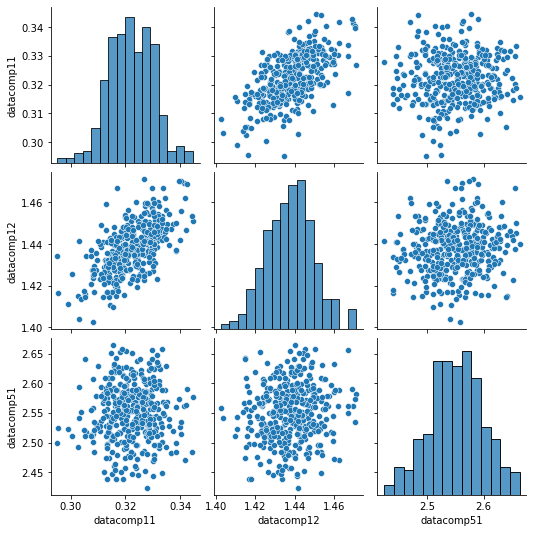

In [132]:
sns.pairplot(df)